In [21]:
import numpy as np
import matplotlib.pyplot as plt
import common_module as cm

今回はRunge-Kutta法を実装する。4次の精度で求められるので、これは非常に便利な常微分方程式の解き方になっている。
$$\frac{df}{dt} = -y+ 3$$

In [22]:
#今回扱う関数の定義
def function(t,y):
      return -1*y + 3

#初期値の設定
t0 = 0
y0 = 1

#刻み幅の設定
dt = 0.1

#計算回数の設定
n = 200000

#計算用の配列を用意
history = np.zeros((0,2))

#初期値の履歴を追加
history = np.vstack((history,np.array([t0, y0])))

In [23]:
# ルンゲクッタ法
def RungeKutta(t, y,f):
      k1 = f(t, y)
      k2 = f(t + dt / 2, y + dt / 2 * k1)
      k3 = f(t + dt / 2, y + dt / 2 * k2)
      k4 = f(t + dt, y + dt * k3)
      y_next = y + dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
      return y_next

In [24]:
t = t0
y = y0

for i in range(n):
      y = RungeKutta(t, y,function)
      t = t + dt
      history = np.vstack((history, np.array([t, y])))

In [25]:
#解析解の計算
def analytical_f(t):
    return (y0 - 3) * np.exp(-1*t) + 3

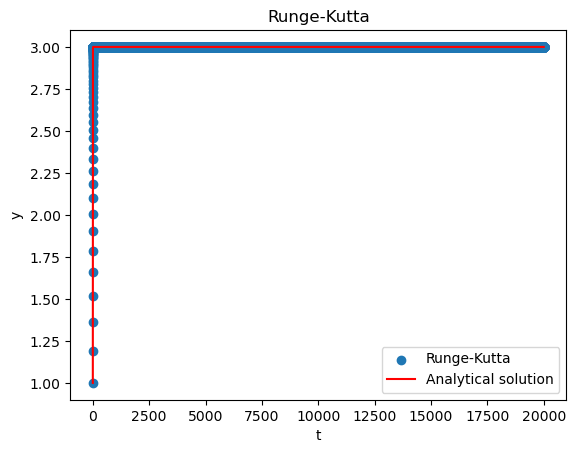

In [26]:
#グラフの描画
cm.plot_easily(history,"Runge-Kutta",analytical_f)

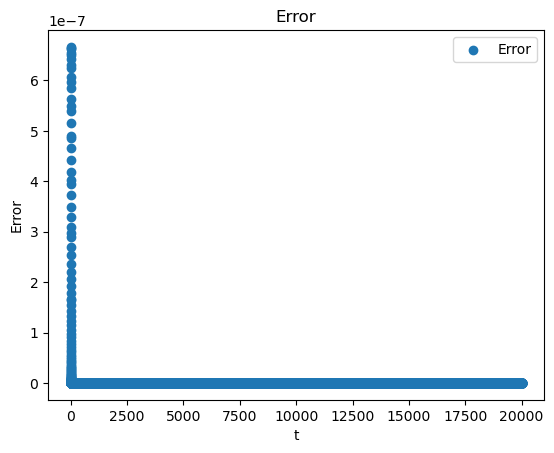

In [20]:
#誤差のグラフの描画
cm.plot_error(history,analytical_f)

ルンゲクッタは、刻み幅の少ないものであっても、またn数の少ないものであっても精度良く導くことができる。そのため、現在の微分方程式を求めるものとして一番汎用的に用いられているのである。